In [19]:
import ssmiDGATE as ssmi
import scanpy as sc
import os

In [138]:
data_dir = "/jdfssz1/ST_BIOINTEL/P20Z10200N0157/Bioinformatic_Frontier_Algorithms/05.user/liulin4/ssmi_DGATE/SLN_111/"
adata_st1 = sc.read_h5ad(os.path.join(data_dir, "SLN_111_D1_RNA.h5ad"))
adata_sp1 = sc.read_h5ad(os.path.join(data_dir, "SLN_111_D1_ADT.h5ad"))

In [142]:
adata_st1.X.shape

(9264, 13553)

In [140]:
adata_sp1.X.max()

6795.0

In [144]:
adata_st1

AnnData object with n_obs × n_vars = 9264 × 13553
    obs: 'n_protein_counts', 'n_proteins', 'seurat_hash_id', 'batch_indices', 'hash_id', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'highly_variable_mean_variance', 'encode', 'hvg_encode'
    uns: 'protein_names', 'version'
    obsm: 'protein_expression'

In [20]:
import torch
torch.set_num_threads(60)

In [21]:
data_dir = "/jdfssz1/ST_BIOINTEL/P20Z10200N0157/Bioinformatic_Frontier_Algorithms/05.user/liulin4/ssmi_DGATE/cbmc"

In [22]:
adata_st = sc.read_h5ad(os.path.join(data_dir, "cbmc_rna.h5ad"))
adata_sp = sc.read_h5ad(os.path.join(data_dir, "cbmc_adt.h5ad"))

In [24]:
adata_st = adata_st[adata_st.obs.index.isin(adata_sp.obs.index),:]
adata_sp = adata_sp[adata_sp.obs.index.isin(adata_st.obs.index),:]

Original ST Data Info: 8617 cells * 20501 genes.


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Original SP Data Info: 8617 cells * 10 genes.


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


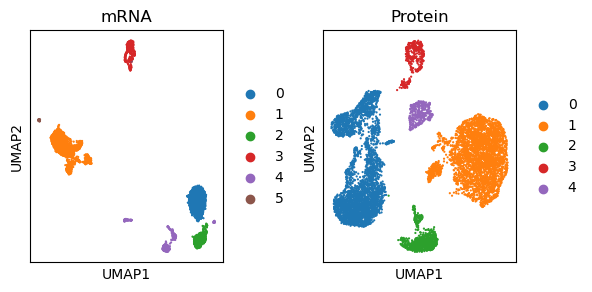

In [25]:
adata_st, adata_sp = ssmi.preprocess_cluster(adata_st, adata_sp, res_st = 0.05, res_sp = 0.01, show_fig = True, figsize = (6,3))

# **Constructing Spatial Neighborhood Graph**

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00cf3dac20>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

------Calculating spatial graph...
The graph contains 134708 edges, 8617 cells.
15.6328 neighbors per cell on average.
++++++Pruning the spatial graph!++++++
134708 edges before pruning.
134490 edges after pruning.


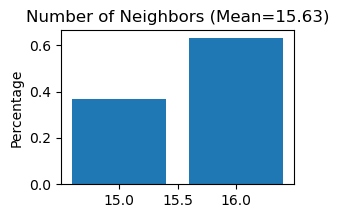

In [78]:
adata_st = ssmi.Cal_Nbrs_Net(adata_st, feat = "X_pca", k_cutoff = 15, model = "KNN")
adata_st = ssmi.prune_net(adata_st)
ssmi.Stats_Nbrs_Net(adata_st)

In [79]:
adata_sp.obsm["X_pca"] = adata_sp.X.toarray()
#sc.tl.pca(adata_sp, svd_solver = 'arpack', n_comps = 15)

------Calculating spatial graph...
The graph contains 129255 edges, 8617 cells.
15.0000 neighbors per cell on average.
++++++Pruning the spatial graph!++++++
129255 edges before pruning.
128889 edges after pruning.


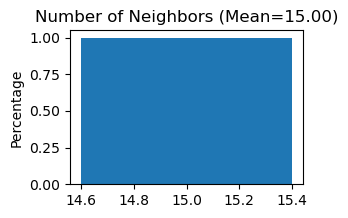

In [80]:
adata_sp = ssmi.Cal_Nbrs_Net(adata_sp, feat = "X_pca", k_cutoff = 15, model = "KNN")
adata_sp = ssmi.prune_net(adata_sp)
ssmi.Stats_Nbrs_Net(adata_sp)

In [99]:
adata_sp.X

<8617x10 sparse matrix of type '<class 'numpy.float32'>'
	with 86170 stored elements in Compressed Sparse Column format>

In [137]:
adata_st, adata_sp = ssmi.train(adata_st, adata_sp, hidden_dims1 = 128, hidden_dims2 = 128, out_dims = 30, cluster_update_epoch = 20, epochs_init = 50, n_epochs=300, save_reconstrction=False, sigma = 0.1, device = "cuda:0", feat1 = "PCA")

  0%|                                                                                                                                                 | 0/50 [00:00<?, ?it/s]/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  0%|                                                                                                                                                | 0/250 [00:00<?, ?it/s]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efe578736d0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.28804993629455566 seconds
Jaccard graph constructed in 12.71096658706665 seconds
Wrote graph to binary file in 0.1512770652770996 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.879245
After 2 runs, maximum modularity is Q = 0.881821
Louvain completed 22 runs in 3.2191450595855713 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 23.837831020355225 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c7137c70>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.33254194259643555 seconds
Jaccard graph constructed in 13.440144777297974 seconds
Wrote graph to binary file in 0.11038327217102051 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.897522
After 2 runs, maximum modularity is Q = 0.899899
After 8 runs, maximum modularity is Q = 0.901553
Louvain completed 28 runs in 3.785151720046997 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 25.689167737960815 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  4%|█████▍                                                                                                                                 | 10/250 [01:21<14:59,  3.75s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c27fee60>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.34015893936157227 seconds
Jaccard graph constructed in 13.099344491958618 seconds
Wrote graph to binary file in 0.13973593711853027 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.88325
After 13 runs, maximum modularity is Q = 0.884797
Louvain completed 33 runs in 5.895631790161133 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 27.090991497039795 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efe578736d0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.27041006088256836 seconds
Jaccard graph constructed in 14.118787050247192 seconds
Wrote graph to binary file in 0.143629789352417 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.897314
After 2 runs, maximum modularity is Q = 0.899725
Louvain completed 22 runs in 2.369631052017212 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 24.97212553024292 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 12%|████████████████▏                                                                                                                      | 30/250 [03:17<13:44,  3.75s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c27fee60>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.30532264709472656 seconds
Jaccard graph constructed in 13.402054071426392 seconds
Wrote graph to binary file in 0.15886688232421875 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.887126
Louvain completed 21 runs in 3.168274164199829 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 24.806140661239624 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c7137c70>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.28922057151794434 seconds
Jaccard graph constructed in 14.132124900817871 seconds
Wrote graph to binary file in 0.12546682357788086 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.899294
Louvain completed 21 runs in 2.1463704109191895 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 24.561196327209473 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 20%|███████████████████████████                                                                                                            | 50/250 [05:08<10:04,  3.02s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efe578736d0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.3692641258239746 seconds
Jaccard graph constructed in 11.942627668380737 seconds
Wrote graph to binary file in 0.13727426528930664 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.890605
Louvain completed 21 runs in 3.084592580795288 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 23.572651624679565 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c7137c70>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.3083055019378662 seconds
Jaccard graph constructed in 12.956823110580444 seconds
Wrote graph to binary file in 0.13416481018066406 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.898136
After 7 runs, maximum modularity is Q = 0.899459
Louvain completed 27 runs in 2.9256627559661865 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 24.397472143173218 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 28%|█████████████████████████████████████▊                                                                                                 | 70/250 [06:56<08:56,  2.98s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c27fee60>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.35184454917907715 seconds
Jaccard graph constructed in 11.91167688369751 seconds
Wrote graph to binary file in 0.14367175102233887 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.89096
Louvain completed 21 runs in 3.161221742630005 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 23.184760332107544 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efe578736d0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.3011295795440674 seconds
Jaccard graph constructed in 12.969657897949219 seconds
Wrote graph to binary file in 0.11765360832214355 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.897105
After 2 runs, maximum modularity is Q = 0.898586
After 19 runs, maximum modularity is Q = 0.899631
Louvain completed 39 runs in 4.00165057182312 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 25.25015163421631 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 36%|████████████████████████████████████████████████▌                                                                                      | 90/250 [08:47<08:15,  3.09s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efe578736d0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.3047044277191162 seconds
Jaccard graph constructed in 12.187719106674194 seconds
Wrote graph to binary file in 0.12591886520385742 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.891916
After 10 runs, maximum modularity is Q = 0.893303
Louvain completed 30 runs in 4.545949220657349 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 24.853355884552002 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efe578736d0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.3096292018890381 seconds
Jaccard graph constructed in 12.235453367233276 seconds
Wrote graph to binary file in 0.13203978538513184 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.896473
After 3 runs, maximum modularity is Q = 0.898925
After 23 runs, maximum modularity is Q = 0.900199
Louvain completed 43 runs in 4.2326905727386475 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 24.652395963668823 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 44%|██████████████████████████████████████████████████████████▉                                                                           | 110/250 [10:39<07:18,  3.13s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c7137c70>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.3359715938568115 seconds
Jaccard graph constructed in 12.241696834564209 seconds
Wrote graph to binary file in 0.15624046325683594 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.89298
After 5 runs, maximum modularity is Q = 0.894407
Louvain completed 25 runs in 3.444230079650879 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 23.89499044418335 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c7137c70>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.307173490524292 seconds
Jaccard graph constructed in 12.679681539535522 seconds
Wrote graph to binary file in 0.13377881050109863 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.899044
After 11 runs, maximum modularity is Q = 0.900062
Louvain completed 31 runs in 3.257375478744507 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 24.012024879455566 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 52%|█████████████████████████████████████████████████████████████████████▋                                                                | 130/250 [12:37<07:04,  3.54s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00c7137c70>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.3773834705352783 seconds
Jaccard graph constructed in 12.749964475631714 seconds
Wrote graph to binary file in 0.1833639144897461 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.893535
After 3 runs, maximum modularity is Q = 0.894614
Louvain completed 23 runs in 3.568697929382324 seconds
Sorting communities by size, please wait ...


 52%|█████████████████████████████████████████████████████████████████████▋                                                                | 130/250 [13:01<12:01,  6.01s/it]


KeyboardInterrupt: 

In [130]:
import matplotlib.pyplot as plt
sc.pp.neighbors(adata_st, n_neighbors = 10, use_rep='ssmi_embed')
sc.tl.umap(adata_st)

/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'ssmiDGATE clusters'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'rna_annotations'}, xlabel='UMAP1', ylabel='UMAP2'>]

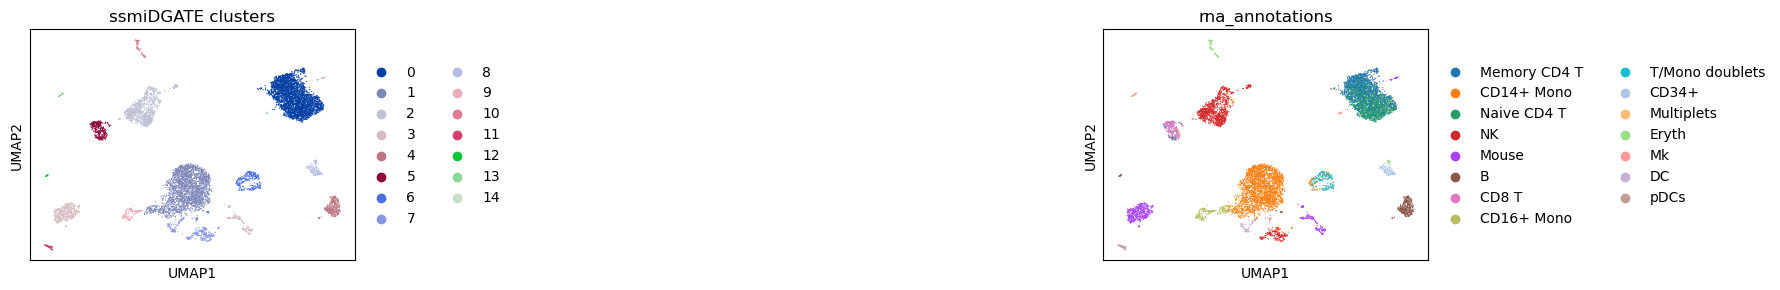

In [135]:
sc.tl.leiden(adata_st, resolution = 0.15, key_added = "ssmi_cluster")
plt.rcParams["figure.figsize"] = [3,3]
sc.pl.umap(adata_st, color=["ssmi_cluster", "rna_annotations"], s = 3, wspace = 2, show = False, title = "ssmiDGATE clusters")

In [136]:
from sklearn.metrics import adjusted_rand_score as ari_score
print('Our method, ARI = %01.3f' % ari_score(adata_st.obs["ssmi_cluster"], adata_st.obs['rna_annotations']))

Our method, ARI = 0.714


In [48]:
outdir = "/jdfssz1/ST_BIOINTEL/P20Z10200N0157/Bioinformatic_Frontier_Algorithms/05.user/liulin4/ssmi_DGATE/cbmc/results"
adata_st.write_h5ad(os.path.join(outdir, "cbmc_st_ssmi.h5ad"))
adata_sp.write_h5ad(os.path.join(outdir, "cbmc_adt_ssmi.h5ad"))